## AI-Powered Trading, Algorithmic Collusion, and Price Efficiency by Goldstein et al - Result Replication

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from util import simulate
from agents import *
from config import Config

The overall collusiveness of all the agents is measured by
$$
\Delta^C = \frac{1}{I}\sum_{i=1}^I \Delta_i^C
$$
where
$$
\Delta_i^C = \frac{\bar{\pi}_i - \bar{\pi}^N_i}{\bar{\pi}^M_i - \bar{\pi}^N_i}
$$
and
$$
\bar{\pi}_i = \frac{1}{T}\sum_{t = T_c}^{T_c + T} \pi_{i,t}(v_t, u_t)
$$

The corresponding nash equilibrium in the perfect collusive case and the noncollusive case are
$$
\pi^N(v_t, u_t) = [v_t - p^N(Ix^N(v_t) + u_t)]x^N(v_t), \ \forall i
$$
$$
\pi^M(v_t, u_t) = [v_t - p^M(Ix^M(v_t) + u_t)]x^M(v_t), \ \forall i
$$
where $$x^M(v_t) = \chi^M(v_t - \bar{v})$$, and $$p^M(Ix^M(v_t) + u_t) = \bar{v} + \lambda^M (Ix^M(v_t) + u_t)$$, and $$x^N(v_t) = \chi^N(v_t - \bar{v})$$, and $$p^N(Ix^N(v_t) + u_t) = \bar{v} + \lambda^N (Ix^N(v_t) + u_t)$$

In [2]:
def calculate_Delta_C(data, config):
    v, p, z, x, u, profit = data['v'], data['p'], data['z'], data['x'], data['u'], data['profit']
    informed = data['agents']['informed']
    noise = data['agents']['noise']
    preferred_habitat = data['agents']['preferred_habitat']
    market_maker = data['agents']['market_maker']

    chi_M, chi_N = informed[0].chiM, informed[0].chiN
    lambda_M, lambda_N = informed[0].lambdaM, informed[0].lambdaN

    x_N = chi_N * (v - config.v_bar)
    x_M = chi_M * (v - config.v_bar)

    p_factor_N = config.v_bar + lambda_N * (config.I * x_N + u)
    p_factor_M = config.v_bar + lambda_M * (config.I * x_M + u)

    pi_N = (v - p_factor_N) * x_N
    pi_M = (v - p_factor_M) * x_M

    pi_N_bar = np.mean(pi_N)
    pi_M_bar = np.mean(pi_M)

    pi_bar = np.mean(profit)
    # print(pi_N_bar, pi_M_bar, pi_bar)
    Delta_C = (pi_bar - pi_N_bar) / (pi_M_bar - pi_N_bar)
    return Delta_C


In [47]:
main_path = '/Users/moyuanchen/Documents/thesis/preferred_with_price/'
folder = sorted([i for i in os.listdir(main_path) if i[0] != '.'], key=lambda x: int(x.split('_')[1]))
last_files = []
for f in folder:
    files = [i for i in os.listdir(os.path.join(main_path, f))]
    # config = np.load(os.path.join(main_path, f, 'config.npy'), allow_pickle=True).item()
    last_file = sorted([i for i in files if i[0] == 'd'], key=lambda x: int(x.split('_')[-1].split('.')[0]))[-1]
    last_files.append(np.load(main_path + f + '/' + last_file, allow_pickle=True).item())
sigmas = [10**(i) for i in range(-5, -2)]

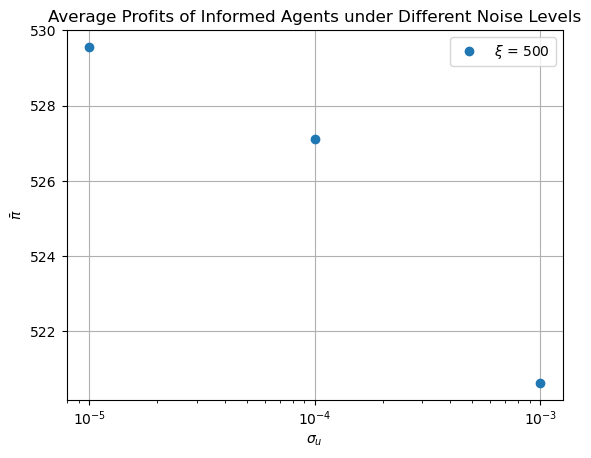

In [48]:
delta = []
profit = []
for idx, s in enumerate(sigmas):
    config = Config(sigma_u=s)
    data = last_files[idx]
    delta.append(calculate_Delta_C(data, config))
    profit.append(np.mean(data['profit']))
plt.plot(sigmas, profit,'o')
plt.xscale('log')
plt.grid(which='major')
plt.ylabel(r'$\bar{\pi}$')
plt.xlabel(r'$\sigma_u$')
plt.legend([r'$\xi$ = 500'])
plt.title('Average Profits of Informed Agents under Different Noise Levels')
plt.savefig('full_average_profit_informed_agents.png', dpi=300, bbox_inches='tight')
# plt.yscale('log')

In [49]:
data = last_files[-3]
data

{'v': array([1.12566137, 1.38532043, 0.87433863, ..., 2.64485335, 2.0364337 ,
        0.32551026]),
 'p': array([0.19999979, 0.19999979, 0.19999979, ..., 0.19999979, 0.19999979,
        0.19999979]),
 'z': array([ 1338.82486341,  1338.54259179,  1338.32648599, ...,
         1137.00454293,  1135.13226723, -1056.74600671]),
 'x': array([[ 170.83330167,  170.83330167,  170.83330167, ...,  170.83330167,
          170.83330167, -170.83330167],
        [ 170.83330167,  170.83330167,  170.83330167, ...,  170.83330167,
          170.83330167, -170.83330167]]),
 'u': array([ 8.84331200e-06, -1.12420255e-05, -4.47080484e-06, ...,
        -5.70878353e-06,  1.62371979e-05, -6.88148596e-06]),
 'profit': array([[478.8988908 , 523.16086116, 435.79431735, ..., 669.47220929,
         564.89417645, 476.28012733],
        [478.8988908 , 523.16086116, 435.79431735, ..., 669.47220929,
         564.89417645, 476.28012733]]),
 'last_state': (30, 6),
 'convergence_counter': 5021983,
 'agents': {'informed': [<

In [50]:
agents = data['agents']['informed']

In [51]:
q= agents[0].Q.Q

In [52]:
q

{(0,
  0): array([10633.44659727, 10259.55995591, 10259.67433045, 10142.98940998,
        10053.44987906,  9948.11140089,  9915.99081689,  9856.51717182,
         9796.71891099,  8583.56289033,  7931.27982903,  7970.88897964,
         8059.30661533,  6591.77076288,  7211.62221097]),
 (0,
  1): array([10534.20318345, 10146.67936876, 10076.92540075, 10007.01451364,
         9976.89213442,  9824.29142926,  9773.7826806 ,  9728.00452002,
         9683.06824842,  8668.48456456,  7908.86314005,  7941.81652272,
         7898.07075121,  7261.59644592,  7279.38175404]),
 (0,
  2): array([10472.9808658 , 10088.58024108, 10060.9334938 ,  9997.01045026,
         9948.2398009 ,  9866.48458607,  9808.1203622 ,  9753.83749031,
         9694.86316508,  8797.79283032,  7964.77217322,  7996.74124052,
         8014.56171229,  7115.95970656,  7241.91973457]),
 (0,
  3): array([10421.76434402, 10057.74548066, 10021.29299948,  9960.22130825,
         9914.09570279,  9863.72477306,  9820.27226168,  9785.2869

In [58]:
sigmas

[1e-05, 0.0001, 0.001]

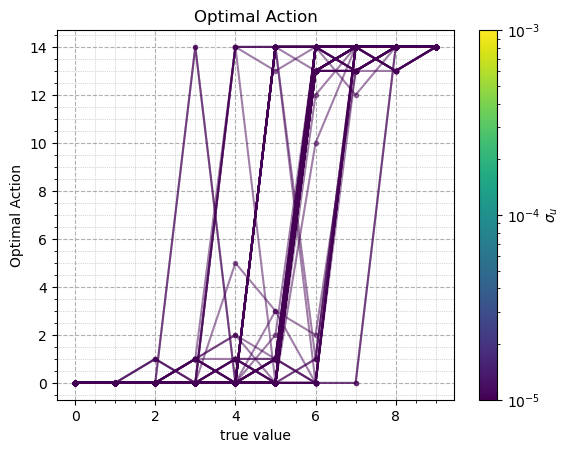

In [56]:
# %matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors
fig, ax = plt.subplots()
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(vmin=0, vmax=30)

for idx, data in enumerate(last_files):
    q = data['agents']['informed'][0].Q.Q
    # Loop over the state space: p in [0,30] and v in [0,9]
    for p_val in range(31):
        actions = []
        for v_val in range(10):
            # q is a dict with keys as tuple (p, v)
            optimal_action = np.argmax(q[(p_val, v_val)])
            actions.append(optimal_action)
        color = cmap(norm(sigmas[idx]))
        ax.plot(range(10), actions, '.-', color=color, alpha = 0.5)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=colors.LogNorm(vmin=1e-5, vmax=1e-3))
sm.set_array([])
plt.colorbar(sm, ax=ax, label=r'$\sigma_u$')
plt.xlabel('true value')
plt.ylabel('Optimal Action')
plt.title("Optimal Action")
plt.minorticks_on()
plt.grid(True, which='major', linestyle='--', linewidth=0.8)
plt.grid(True, which='minor', linestyle=':', linewidth=0.5)


ValueError: x and y must have same first dimension, but have shapes (10,) and (341,)

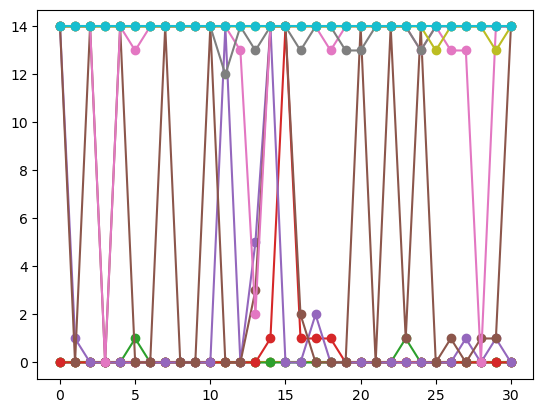

In [55]:

# plt.savefig('optimal_action.png', dpi=300, bbox_inches='tight')
# plt.show()
for idx, data in enumerate(last_files):
    q = data['agents']['informed'][0].Q.Q
    # plt.figure()
    for v_val in range(10):
        actions = []
        for p_val in range(31):
            # q is a dict with keys as tuple (p, v)
            optimal_action = np.argmax(q[(p_val, v_val)])
            actions.append(optimal_action)
        plt.plot(range(31), actions, '-o',label=f'v={v_val}')




    for p_val in range(31):
        for v_val in range(10):
            # q is a dict with keys as tuple (p, v)
            optimal_action = np.argmax(q[(p_val, v_val)])
            p_vals.append(p_val)
            v_vals.append(v_val)
            actions.append(optimal_action)


    for p in p_vals:
        plt.plot(range(10), actions, '.',label=f'p={p}')
    break

    ax.scatter(p_vals, v_vals, actions, marker='.', label='Optimal Action')
# plt.legend()

ax.set_xlabel('p')
ax.set_ylabel('v')
# ax.set_zlabel('Optimal Action')
plt.title("3D Plot: Optimal Action vs. p (x-axis) and v (y-axis)")
# plt.tight_layout()
plt.show()

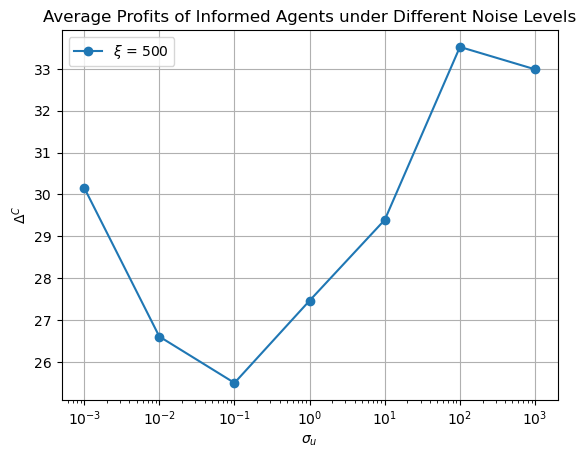

In [8]:
delta = []
for idx, s in enumerate(sigmas[7:]):
    config = Config(sigma_u=s)
    data = last_files[idx + 7]
    delta.append(calculate_Delta_C(data, config))
plt.plot(sigmas[7:], delta,'o-')
plt.xscale('log')
plt.grid(which='major')
plt.ylabel(r'$\Delta^C$')
plt.xlabel(r'$\sigma_u$')
plt.legend([r'$\xi$ = 500'])
plt.title('Average Profits of Informed Agents under Different Noise Levels')
plt.savefig('average_profit_informed_agents.png', dpi=300, bbox_inches='tight')
# plt.yscale('log')

In [67]:
# sim_0_path = '/Users/moyuanchen/Documents/thesis/sim_0/'
sims = ['/Users/moyuanchen/Documents/thesis/sim_3/data_part_34.npy',
        '/Users/moyuanchen/Documents/thesis/sim_4/data_part_78.npy',
        '/Users/moyuanchen/Documents/thesis/sim_5/data_part_37.npy',
        '/Users/moyuanchen/Documents/thesis/sim_6/data_part_37.npy',
        '/Users/moyuanchen/Documents/thesis/sim_7/data_part_41.npy',
        '/Users/moyuanchen/Documents/thesis/sim_8/data_part_490.npy',
        '/Users/moyuanchen/Documents/thesis/sim_10/data_part_35.npy',
        '/Users/moyuanchen/Documents/thesis/sim_11/data_part_35.npy',
        '/Users/moyuanchen/Documents/thesis/sim_12/data_part_31.npy',
        '/Users/moyuanchen/Documents/thesis/sim_13/data_part_37.npy',
        '/Users/moyuanchen/Documents/thesis/sim_14/data_part_{partitions}.npy',
        '/Users/moyuanchen/Documents/thesis/sim_14/data_part_{partitions}.npy',
        '/Users/moyuanchen/Documents/thesis/sim_15/data_part_{partitions}.npy',
        '/Users/moyuanchen/Documents/thesis/sim_16/data_part_{partitions}.npy',
        '/Users/moyuanchen/Documents/thesis/sim_17/data_part_{partitions}.npy',
        '/Users/moyuanchen/Documents/thesis/sim_18/data_part_{partitions}.npy',]
        
sigma = [0.1,100,0.01,1,10,1000, 0.001, 1e-4, 1e-5, 1e-6, 1e-7,1e-8,1e-9,1e-10,1e-11,1e-12]

Let's try to compute $\Delta^C$ for these two simulations

In [68]:
def calculate_Delta_C(data, config):
    v, p, z, x, u, profit = data['v'], data['p'], data['z'], data['x'], data['u'], data['profit']
    informed = data['agents']['informed']
    noise = data['agents']['noise']
    preferred_habitat = data['agents']['preferred_habitat']
    market_maker = data['agents']['market_maker']

    chi_M, chi_N = informed[0].chiM, informed[0].chiN
    lambda_M, lambda_N = informed[0].lambdaM, informed[0].lambdaN

    x_N = chi_N * (v - config.v_bar)
    x_M = chi_M * (v - config.v_bar)

    p_factor_N = config.v_bar + lambda_N * (config.I * x_N + u)
    p_factor_M = config.v_bar + lambda_M * (config.I * x_M + u)

    pi_N = (v - p_factor_N) * x_N
    pi_M = (v - p_factor_M) * x_M

    pi_N_bar = np.mean(pi_N)
    pi_M_bar = np.mean(pi_M)

    pi_bar = np.mean(profit)
    print(pi_N_bar, pi_M_bar, pi_bar)
    Delta_C = (pi_bar - pi_N_bar) / (pi_M_bar - pi_N_bar)
    return Delta_C


In [73]:
data = np.load('/Users/moyuanchen/Documents/thesis/5mconv/sim_0/data_part_46.npy', allow_pickle=True).item()
config = Config(sigma_u = 1e-10)
print(calculate_Delta_C(data, config))

46.75315943669094 52.59729384681431 196.92345197272346
25.695899854032017


In [69]:
Delta_c = []
for s in sims:
    _save_path = s
    config = Config()
    config.sigma_u = sigma[sims.index(s)]
    Delta_c.append(calculate_Delta_C(np.load(_save_path, allow_pickle=True).item(), config))


46.7999611190733 52.649966988860015 127.30341717764438
46.55178440937821 52.35622523914241 183.6858306737123
46.700920130934584 52.53852493679011 141.12556391505169
46.79388359623777 52.64326551256148 138.14515903559945
46.71961425340981 52.56019457773167 141.13337162996228
46.42719534945557 52.324808219266735 240.70024511962563
46.75879370505451 52.60363257385074 131.52229936754134
46.676970305133565 52.511581107216315 133.17230017847535
46.918002752404824 52.782742539955116 117.10444249893459
46.58091250835487 52.40351609106295 141.7925894071273
46.84423166826581 52.6997500868458 127.99338917232531
46.84423166826581 52.6997500868458 127.99338917232531
46.543705284210695 52.36165797240131 120.27025521935123
46.746290373307055 52.589566152053 136.85764308244399
46.76681876636548 52.61266058962486 123.94107969321554
46.62831216071156 52.456840689428184 127.24905775551625


In [70]:
sigma

[0.1,
 100,
 0.01,
 1,
 10,
 1000,
 0.001,
 0.0001,
 1e-05,
 1e-06,
 1e-07,
 1e-08,
 1e-09,
 1e-10,
 1e-11,
 1e-12]

In [71]:
Delta_c

[13.761260732120627,
 23.625711810366575,
 16.175237434607183,
 15.617252685182036,
 16.165132937798376,
 32.94096341328531,
 14.502282708769393,
 14.824524344017258,
 11.967528362557877,
 16.35207953732783,
 13.858577789895984,
 13.858577789895984,
 12.672249825061657,
 15.421375974911822,
 13.20156502007801,
 13.83209247369961]

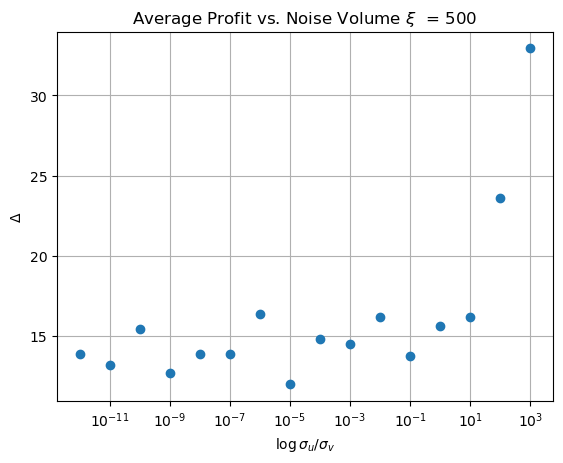

In [72]:
plt.plot([0.1,
 100,
 0.01,
 1,
 10,
 1000,
 0.001,
 0.0001,
 1e-05,
 1e-06,
 1e-07,
 1e-08,
 1e-09,
 1e-10,
 1e-11,
 1e-12],[13.761260732120627,
 23.625711810366575,
 16.175237434607183,
 15.617252685182036,
 16.165132937798376,
 32.94096341328531,
 14.502282708769393,
 14.824524344017258,
 11.967528362557877,
 16.35207953732783,
 13.858577789895984,
 13.858577789895984,
 12.672249825061657,
 15.421375974911822,
 13.20156502007801,
 13.83209247369961],'o')
plt.xscale('log')
plt.xlabel(r'$\log\sigma_u/ \sigma_v$')
plt.ylabel(r'$\Delta$')
plt.title(r'Average Profit vs. Noise Volume $\xi$  = 500')
plt.grid()
plt.savefig('Delta_c_3.png', dpi=300)

In [13]:
print(Delta_c)

[13.761260732120627, 23.625711810366575, 16.175237434607183, 15.617252685182036, 16.165132937798376]


In [39]:
config = Config()
config.sigma_u = 100

_save_path = '/Users/moyuanchen/Documents/thesis/sim_4/data_part_78.npy'
log, agents = simulate(config = config, T = 100000, save_path=_save_path, continue_simulation=sim_2_fn[-2])

Simulation Progress: 100%|██████████| 100000/100000 [00:22<00:00, 4516.02it/s]


In [40]:
data = np.load(_save_path, allow_pickle=True).item()
Delta_C = calculate_Delta_C(data, config)
Delta_C

46.55178440937821 52.35622523914241 183.6858306737123


23.625711810366575

#### In both simulations the profit is higher than the maximum possible collusive strategy
Check the agents to see what is going on

In [10]:
sim_1 = np.load(sim_1_fn[-1], allow_pickle=True).item()
informed = sim_1['agents']['informed']
lambdaM, lambdaN = informed[0].lambdaM, informed[0].lambdaN
chiM, chiN = informed[0].chiM, informed[0].chiN

In [14]:
sim_1

{'v': array([ 0.87433863,  1.12566137, -0.64485335, ..., -0.03643334,
         2.0364337 ,  1.67448974]),
 'p': array([0.30625885, 0.78654118, 0.30625885, ..., 1.69374115, 1.69374115,
        0.30625885]),
 'z': array([ 346.87057608,  106.72940803,  346.87057608, ..., -346.87057608,
        -346.87057608,  346.87057608]),
 'x': array([[  48.80951476,  170.83330167, -170.83330167, ..., -170.83330167,
          170.83330167,  170.83330167],
        [  48.80951476,  170.83330167,    0.        , ..., -170.83330167,
          170.83330167,  170.83330167]]),
 'u': array([-0.13879325,  0.06073311, -0.05174749, ..., -0.03356668,
         0.01263694, -0.02206286]),
 'profit': array([[  3.21018122, 137.64319886, 339.96566694, ..., 295.6956367 ,
         291.898733  , 230.05971776],
        [  3.21018122, 137.64319886,  -0.        , ..., 295.6956367 ,
         291.898733  , 230.05971776]]),
 'last_state': (2, 1),
 'convergence_counter': 1275928,
 'agents': {'informed': [<agents.InformedAgent at 0

In [42]:
mm = sim_1['agents']['market_maker']
mm.historical_data

{'v': <agents.CircularBuffer at 0x30e0f6660>,
 'p': <agents.CircularBuffer at 0x30e0f67b0>,
 'z': <agents.CircularBuffer at 0x30e0f6840>,
 'y': <agents.CircularBuffer at 0x30e0f68d0>}

In [ ]:
for _ in range(mm.Tm):
    print(mm.historical_data['y'].get())
    mm.determine_price()
    break

[ 341.72496114 -292.82767558 -244.02808099 ... -341.70017002  341.67924027
  341.64454048]


In [13]:
# data = np.load(folder+filename_converged[0], allow_pickle=True).item()
profit = sim_1['profit']
v = sim_1['v']
u = sim_1['u']
# for n in filename_converged[1:]:
    
#     data = np.load(folder + n, allow_pickle=True).item()
#     profit = np.concatenate((profit, data['profit']), axis = 1)
    # print(sum([data['agents']['informed'][0].state_count[i] for i in data['agents']['informed'][0].state_count]))



In [15]:
profit.shape

(2, 100000)

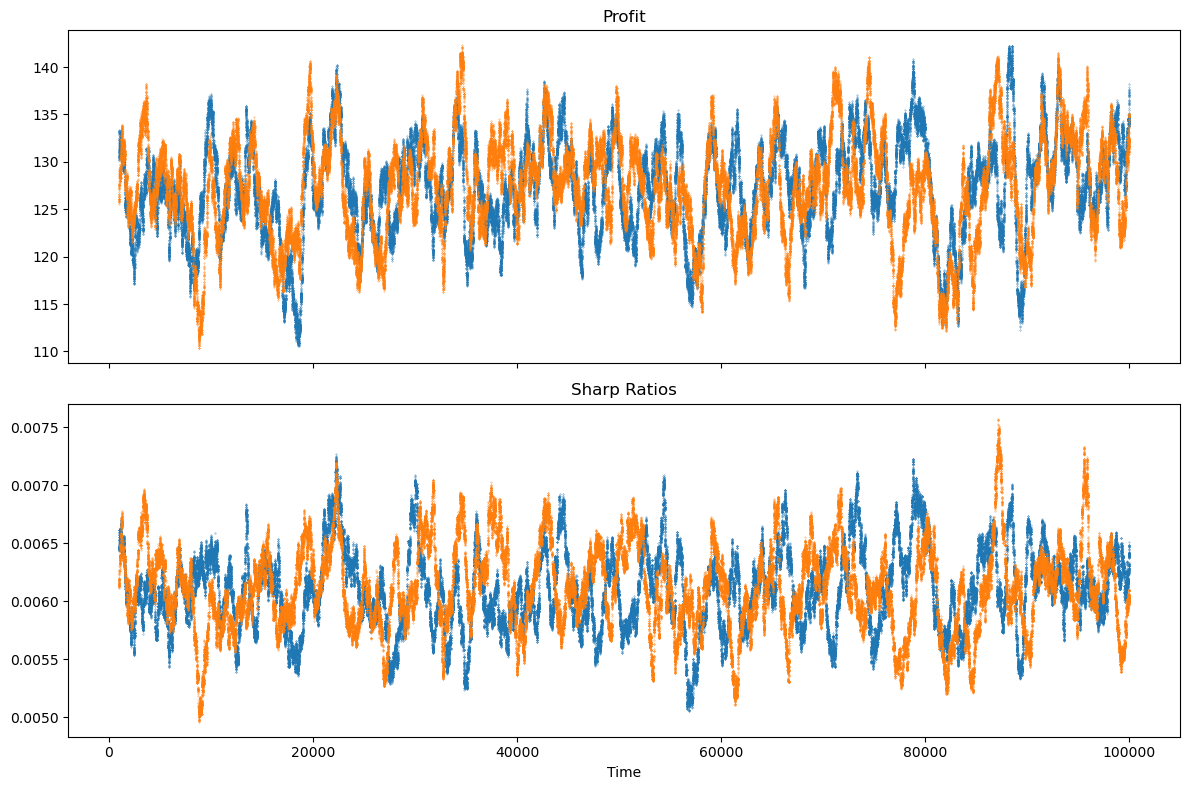

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
window_size = 1000
for i in range(2):
    profit_series = pd.Series(profit[i])
    returns = profit_series
    returns_mean = returns.rolling(window=window_size).mean()
    profit_var = profit_series.rolling(window=window_size).var()
    sharp_ratio = returns_mean / profit_var
    
    axes[0].plot(returns_mean, '.', markersize=0.5, label=f'Profit {i}')
    axes[1].plot(sharp_ratio, '.', markersize=0.5, label=f'Sharp Ratio {i}')

axes[0].set_title('Profit')
axes[1].set_title('Sharp Ratios')
# axes[0].legend()
# axes[1].legend()
plt.xlabel('Time')
plt.tight_layout()
plt.show()

In [37]:
average_return = np.mean(profit)
chiN, lambdaN = solve_chiN(I = 2, xi = 1000, sigma_u = 0.1, sigma_v = 100000, theta = 1)
chiM, lambdaM = solve_chiM(I = 3, xi = 500, sigma_u = 0.1, sigma_v = 1, theta = 0.1)


In [38]:
lambdaN

0.00100000050000025

In [18]:
data

{'v': array([-0.43953145, -0.9599638 , -0.9599638 , ...,  1.5977602 ,
         1.93458927,  1.75541496]),
 'p': array([0.27962349, 1.78040789, 1.78040789, ..., 0.30963918, 0.30963918,
        0.30963918]),
 'z': array([ 360.18825608, -390.20394408, -390.20394408, ...,  345.18041207,
         345.18041207,  345.18041207]),
 'x': array([[-120.25860672, -129.16665167, -129.16665167, ...,  129.16665167,
          129.16665167,  129.16665167],
        [-120.25860672, -120.25860672, -120.25860672, ...,  129.16665167,
          129.16665167,  129.16665167],
        [-129.16665167, -120.25860672, -120.25860672, ...,  129.16665167,
          129.16665167,  129.16665167]]),
 'y': array([[-120.25860672, -129.16665167, -129.16665167, ...,  129.16665167,
          129.16665167,  129.16665167],
        [-120.25860672, -120.25860672, -120.25860672, ...,  129.16665167,
          129.16665167,  129.16665167],
        [-129.16665167, -120.25860672, -120.25860672, ...,  129.16665167,
          129.166651